# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [10]:
from scipy import stats 
import numpy as np

In [11]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [12]:
#Importing required libraries & ttest function
from scipy import stats 
import numpy as np
from scipy.stats             import ttest_1samp, ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Calculating critical values - Mean, Standard Deviation, Standard Error

GPU1_n= np.size(GPU1)
GPU1_xbar = np.mean(GPU1)
GPU1_sd = np.std(GPU1, ddof=1)
GPU1_se = GPU1_sd/np.sqrt(GPU1_n)

print("The critical values are")
print("Sample Mean = %2.1f" %np.mean(GPU1))
print("SD = %2.1f" %(np.std(GPU1, ddof=1)))
print("Standard Error = ", GPU1_se)

The critical values are
Sample Mean = 10.3
SD = 1.2
Standard Error =  0.3034196632775998


### Performing One Sample T-Test

#### Null Hypothesis is that Mean is equal to zero.

#### Alternate hypothesis is that it is not equal to zero.

Choosing alpha = 0.05

In [14]:
t_statistic, p_value = ttest_1samp(GPU1, GPU1_xbar)
print("Result of One Sample Tests")
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)

Result of One Sample Tests
T-Statistic =  0.0
P-Value =  1.0


#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is greater than 0.05 or 5%(Alpha) hence Failed to the Reject Null Hypothesis"

## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [15]:
#Assuming alpha  = 0.05
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU2)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)

T-Statistic =  -2.5422940006896315
P-Value =  0.02346537162637542


#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is lesser than 0.05 or 5%(Alpha) hence Reject Null Hypothesis."

## Question 3

He is trying a third GPU - GPU3.

In [16]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [17]:
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU3)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)

T-Statistic =  -1.585355832526882
P-Value =  0.13520778142018045


#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is greater than 0.05 or 5%(Alpha) hence failed to Reject Null Hypothesis."

## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [18]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [19]:
from scipy.stats import levene
print("The critical values")
print("e1 Sample Mean = ", (np.mean(e1)))
print("e2 Sample Mean = ", (np.mean(e2)))
print("e3 Sample Mean = ", (np.mean(e3)))
print("\nRunning Levene Test")
t_statistic, p_value = levene(e1, e2, e3)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)

The critical values
e1 Sample Mean =  0.7537925
e2 Sample Mean =  1.69759475
e3 Sample Mean =  0.7444685

Running Levene Test
T-Statistic =  2.6741725711150446
P-Value =  0.12259792666001798


#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is greater than 0.05 or 5%(Alpha) hence failed to Reject Null Hypothesis."

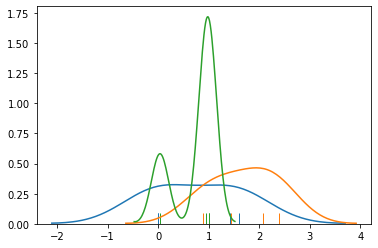

Running One-Way ANOVA Test

F-Value =  2.51357622845924
P-Value =  0.13574644501798466


In [20]:
#Ploting distribution plot
sns.distplot(e1, hist=False, rug=True)
sns.distplot(e2, hist=False, rug=True)
sns.distplot(e3, hist=False, rug=True)
plt.show()

print("Running One-Way ANOVA Test\n")

f, p = stats.f_oneway(e1, e2, e3)
print("F-Value = ", f)
print("P-Value = ", p)

#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is greater than 0.05 or 5%(Alpha) hence failed to Reject Null Hypothesis."

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

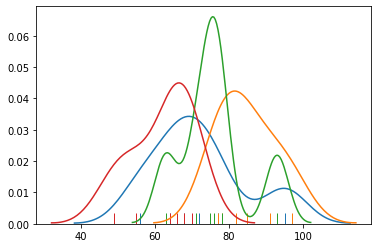


Running One-Way ANOVA Test
F-Value =  5.406342913776015
P-Value =  0.0068759477547351
P-Value is lesser than 0.05 hence [Null Hypothesis] - Reject Null.


In [21]:
import seaborn as sns
data1 = np.array([64,72,68,77,56,95])
data2 = np.array([78,91,97,82,85,77])
data3 = np.array([75,93,78,71,63,76])
data4 = np.array([55,66,49,64,70,68])
#Creating Matrix
data5 = [data1,data2,data3,data4]

#Ploting distribution plot to verify the overlapping
sns.distplot(data5[0], hist=False, rug=True)
sns.distplot(data5[1], hist=False, rug=True)
sns.distplot(data5[2], hist=False, rug=True)
sns.distplot(data5[3], hist=False, rug=True)
plt.show()

print("\nRunning One-Way ANOVA Test")

F, p = stats.f_oneway(data1, data2, data3, data4)
print("F-Value = ", F)
print("P-Value = ", p)
print("P-Value is lesser than 0.05 hence [Null Hypothesis] - Reject Null.")

#### After checking if P-Value > Alpha i.e. 5%

## Conclusion

### "As P-Value is lesser than 0.05 or 5%(Alpha) hence Reject Null Hypothesis."

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

### Type I error

When the null hypothesis is true and we reject it, we make a type I error. 
The probability of making a type I error is α, which is the level of significance we set for our hypothesis test. 
An α of 0.05 indicates that we are willing to accept a 5% chance that we are wrong when we reject the null hypothesis. 
To lower this risk, we must use a lower value for α. 

### Type II error

When the null hypothesis is false and we fail to reject it, we make a type II error. 
The probability of making a type II error is β, which depends on the power of the test. 
We can decrease risk of committing a type II error by ensuring our test has enough power.
We can do this by ensuring that sample size is large enough to detect a practical difference when one truly exists.

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


### Null Hypothesis : 
Waiting time to place order is equal to last month waiting time i.e. 4.5 Mintues

### Alternate Hypothesis : 
Waiting time to place order is not equal to last month waiting time i.e. 4.5 Mintues and has changed significantly

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [22]:
import numpy as np
import pandas as pd

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

In [23]:
#Creating a data frame
df_PlayersDiceRoll = pd.DataFrame(dice)
DiceNum = ['One', 'Two', 'Three', 'Four', 'Five', 'Six'] 
df_PlayersDiceRoll["Dice"] = DiceNum
df_PlayersDiceRoll = df_PlayersDiceRoll.rename(columns={0: 'Player1', 1: 'Player2', 2: 'Player3', 3: 'Player4'})
df_PlayersDiceRoll

,Player1,Player2,Player3,Player4,Dice
0,5,8,3,8,One
1,9,6,8,5,Two
2,8,12,7,2,Three
3,4,16,7,3,Four
4,3,9,6,5,Five
5,7,2,5,7,Six


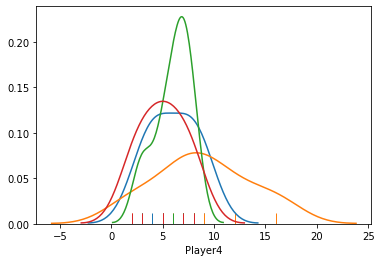

In [24]:
#Ploting distribution plot to verify the overlapping
sns.distplot(df_PlayersDiceRoll["Player1"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player2"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player3"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player4"], hist=False, rug=True)
plt.show()

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [25]:
#Running a Chi Square Test and Displaying respective results
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("Chi2 Statistics =", chi2_stat)
print("Degrees of Freedom = ", dof)
print("P-Value = ", p_val)
print("\nContingency Table: \n", ex)

Chi2 Statistics = 23.315671914716496
Degrees of Freedom =  15
P-Value =  0.07766367301496693

Contingency Table: 
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Conclusion

### "As P-Value is more than 0.01 or 1%(Threshold) hence failed to Reject Null Hypothesis."

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [26]:
z_scores = stats.zscore(dice, axis=1, ddof=1)
p_values = stats.norm.sf(abs(z_scores))
print("ZScore\n", z_scores)
print("P-Value\n", p_values)
print("P Mean\n", np.mean(p_values))

ZScore
 [[-0.40824829  0.81649658 -1.22474487  0.81649658]
 [ 1.09544512 -0.54772256  0.54772256 -1.09544512]
 [ 0.1823492   1.15487828 -0.06078307 -1.27644442]
 [-0.59160798  1.43676223 -0.08451543 -0.76063883]
 [-1.1         1.3         0.1        -0.3       ]
 [ 0.7406129  -1.37542395 -0.10580184  0.7406129 ]]
P-Value
 [[0.3415457  0.20710809 0.11033568 0.20710809]
 [0.13666084 0.29194121 0.29194121 0.13666084]
 [0.42765434 0.12407014 0.47576599 0.10089923]
 [0.27705657 0.07539278 0.46632332 0.22343641]
 [0.13566606 0.09680048 0.46017216 0.38208858]
 [0.22946409 0.08450002 0.45786979 0.22946409]]
P Mean
 0.2487469049916935


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [27]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

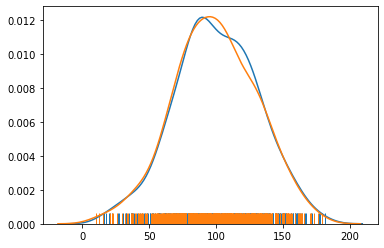

In [28]:
#Ploting distribution plot to validate normal distribution and overlapping
sns.distplot(before, hist=False, rug=True)
sns.distplot(after, hist=False, rug=True)
plt.show()

In [29]:
print("Running the two paired samples TTest")
t_statistic, p_value  =  stats.ttest_rel(after, before)
print("T-Statistic = ", t_statistic)
print("P Value = %1.3f" %(p_value))

Running the two paired samples TTest
T-Statistic =  -4.277471816250551
P Value = 0.000


## Conclusion

### "As P-Value is lesser than 0.05 or 5%(Alpha) hence Reject Null Hypothesis."